# Housing Prices

Predicting House Prices Using Linear Regression

Database:

https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

## Goal

Generate a regression model with the objective of predicting the sales prices of properties in a given region.

## Attributes

price

area

bedrooms

bathrooms

stories

mainroad

guestroom

basement

hotwaterheating

airconditioning

parking

prefarea

furnishingstatus

## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns; 
import matplotlib.pyplot as plt

from scipy.stats import boxcox
from scipy.stats import shapiro

from sklearn import metrics
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Data import

In [2]:
Housing_prices_df = pd.read_csv("https://raw.githubusercontent.com/protasiolai/Housing_prices-Linear_Regression/main/Housing.csv")

## Exploratory Analysis

In [3]:
Housing_prices_df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
Housing_prices_df.tail(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
Housing_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


From the general information it is possible to observe:

This database is composed of 545 records with a total of 13 attributes;

Attribute types can be divided into integers and objects;

It is already possible to observe that all the data are complete, without null data.

In [6]:
# Distribution of categorical variables
for c in ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]:
    print ("---- %s ---" % c)
    print (Housing_prices_df[c].value_counts())

---- mainroad ---
yes    468
no      77
Name: mainroad, dtype: int64
---- guestroom ---
no     448
yes     97
Name: guestroom, dtype: int64
---- basement ---
no     354
yes    191
Name: basement, dtype: int64
---- hotwaterheating ---
no     520
yes     25
Name: hotwaterheating, dtype: int64
---- airconditioning ---
no     373
yes    172
Name: airconditioning, dtype: int64
---- prefarea ---
no     417
yes    128
Name: prefarea, dtype: int64
---- furnishingstatus ---
semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64


### Changing the data type

In [10]:
# fillna(0) is used before converting to int64 to replace any non-finite values (NaN or inf) with 0

Housing_prices_df['mainroad'] = Housing_prices_df['mainroad'].map({'yes': 1, 'no': 0}).fillna(0).astype(np.int64)
Housing_prices_df['guestroom'] = Housing_prices_df['guestroom'].map({'yes': 1, 'no': 0}).fillna(0).astype(np.int64)
Housing_prices_df['basement'] = Housing_prices_df['basement'].map({'yes': 1, 'no': 0}).fillna(0).astype(np.int64)
Housing_prices_df['hotwaterheating'] = Housing_prices_df['hotwaterheating'].map({'yes': 1, 'no': 0}).fillna(0).astype(np.int64)
Housing_prices_df['airconditioning'] = Housing_prices_df['airconditioning'].map({'yes': 1, 'no': 0}).fillna(0).astype(np.int64)
Housing_prices_df['prefarea'] = Housing_prices_df['prefarea'].map({'yes': 1, 'no': 0}).fillna(0).astype(np.int64)
Housing_prices_df['furnishingstatus'] = Housing_prices_df['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2 }).fillna(0).astype(np.int64)

In [11]:
# Checking data types

Housing_prices_df.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object

### Descriptive statistics

In [12]:
Housing_prices_df.describe().round(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,545.00,545.00,545.00,545.00,545.00,545.0,545.0,545.0,545.0,545.0,545.00,545.0,545.0
mean,4766729.25,5150.54,2.97,1.29,1.81,0.0,0.0,0.0,0.0,0.0,0.69,0.0,0.0
std,1870439.62,2170.14,0.74,0.50,0.87,0.0,0.0,0.0,0.0,0.0,0.86,0.0,0.0
min,1750000.00,1650.00,1.00,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
25%,3430000.00,3600.00,2.00,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
50%,4340000.00,4600.00,3.00,1.00,2.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
75%,5740000.00,6360.00,3.00,2.00,2.00,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0
max,13300000.00,16200.00,6.00,4.00,4.00,0.0,0.0,0.0,0.0,0.0,3.00,0.0,0.0


From the Price target it is possible to observe:

A mean of 4,766,729.25 and a standard deviation of 1,870,439.62. The minimum amount is 1,750,000.00, while the maximum amount is 13,300,000.00. The 25th percentile is 3,430,000.00, the 50th percentile (or median) is 4,340,000.00, and the 75th percentile is 5,740,000.00.

We can conclude that the data are positive skewed because the mean is greater than the median. The range of data is quite large, with a minimum value of 1,750,000.00 and a maximum value of 13,300,000.00, which is already expected since these are property values, which indicate great variability.

### Null Attributes

In [13]:
Housing_prices_df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

There is no missing data

### Retrieving numeric columns

In [15]:
types = ['float64', 'int64']
numeric_columns = Housing_prices_df.select_dtypes(include=types).columns
len(numeric_columns)

13

### Distribution of variables

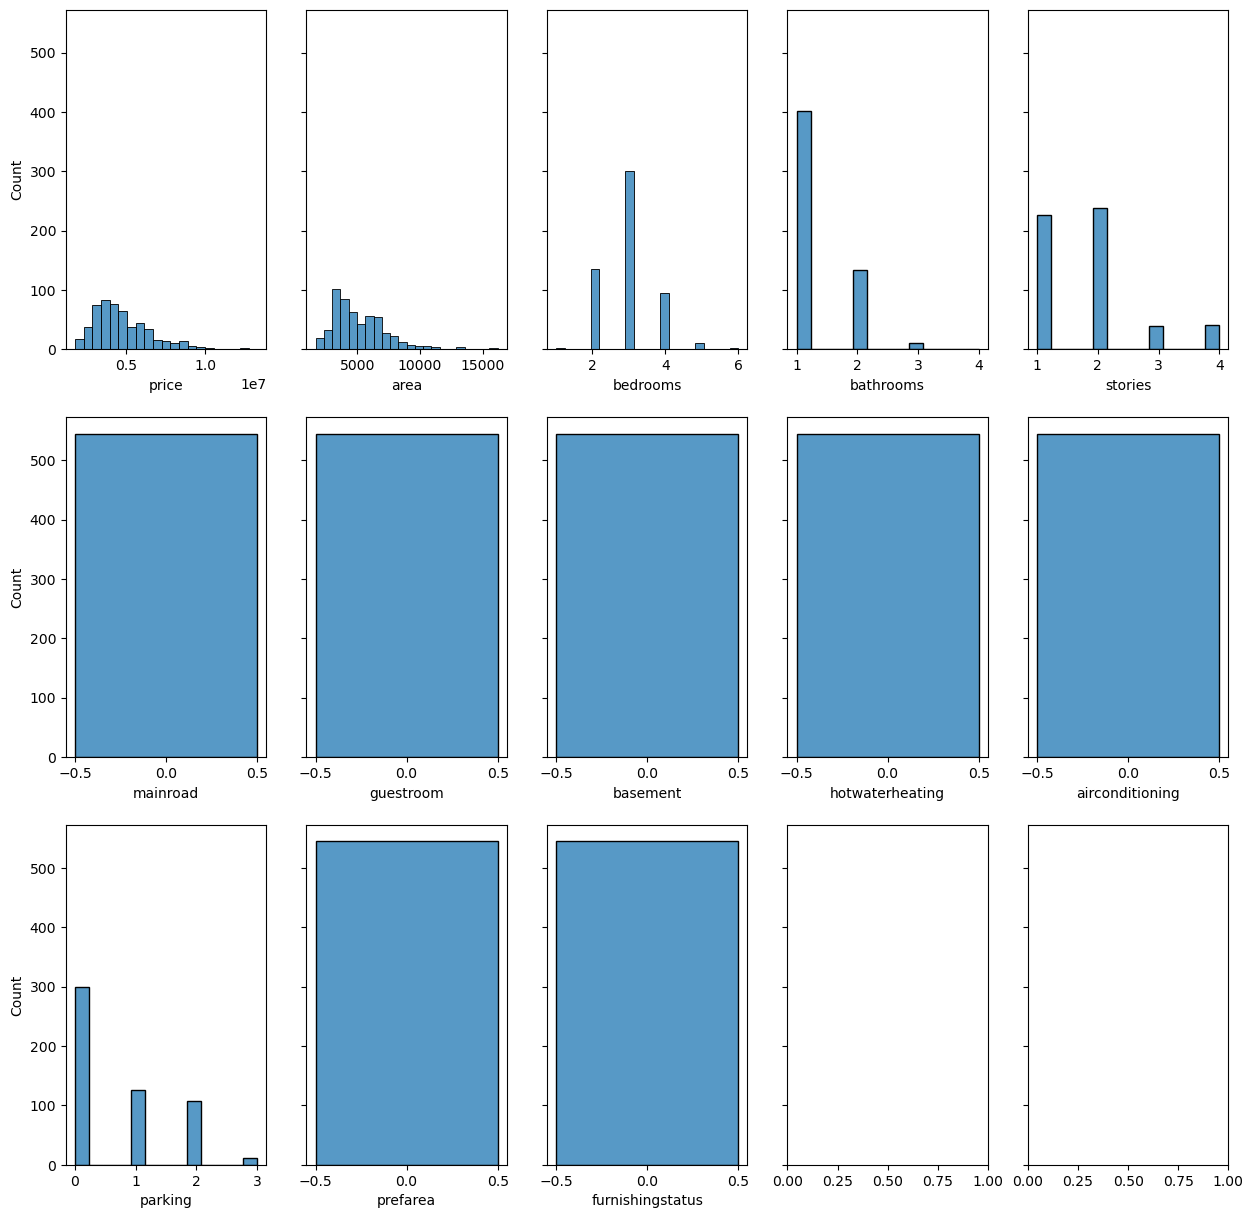

In [16]:
n_cols = 5
n_rows = 3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15,15), sharey=True)
for i, column in enumerate(numeric_columns):
    sns.histplot(Housing_prices_df[column],ax=axes[i//n_cols,i%n_cols]);

### Target Behavior

<Axes: title={'center': 'price'}>

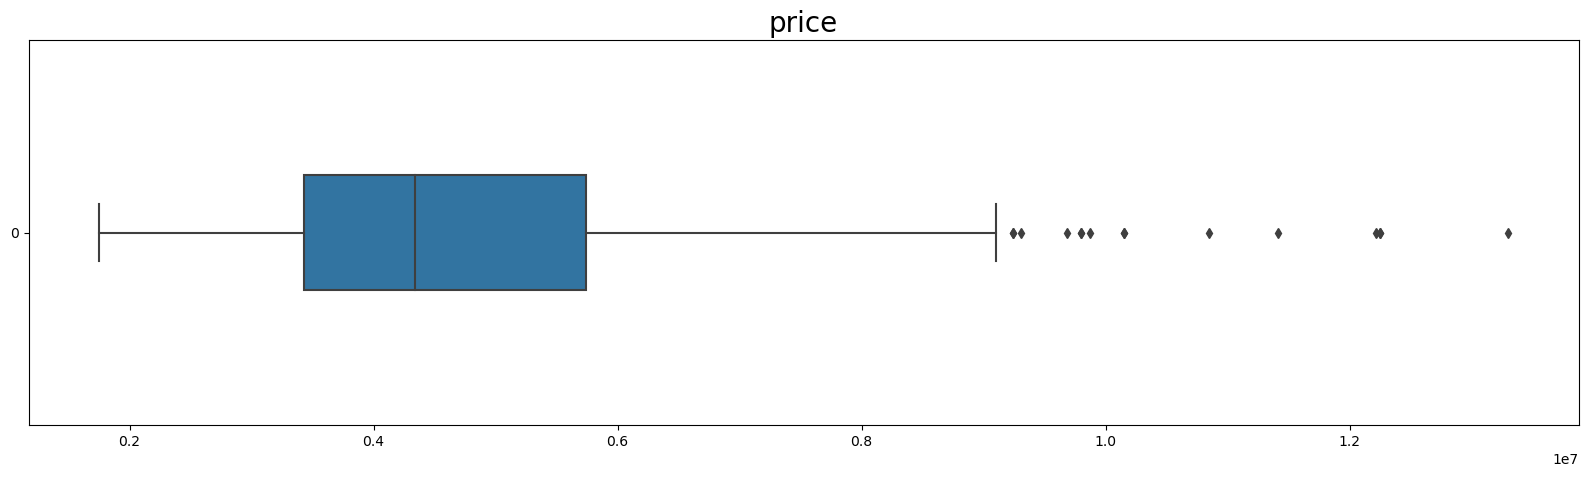

In [17]:
ax = sns.boxplot(data=Housing_prices_df['price'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('price', fontsize=20)
ax

<Axes: title={'center': 'Frequency Distribution'}, xlabel='Property Prices (R$)', ylabel='Count'>

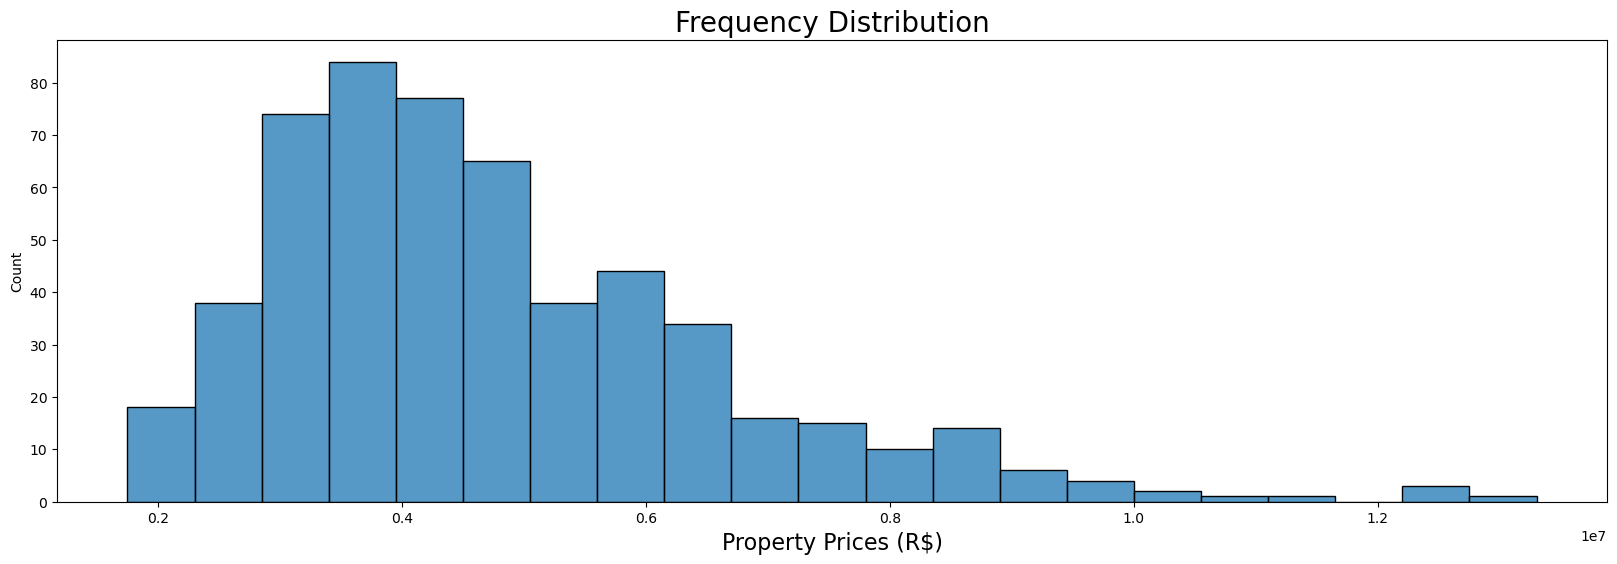

In [18]:
ax = sns.histplot(Housing_prices_df['price'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Frequency Distribution', fontsize=20)
ax.set_xlabel('Property Prices (R$)', fontsize=16)
ax

It is seen that:

The type of variable we are analyzing has this type of behavior, with a right asymmetry.

With a very high concentration of properties with lower values and a very low concentration of more expensive properties.

### Checking the normality of the data

In [19]:
def test_normality(data):
  stat, p = shapiro(data)
  print('Statistic=%.3f, p-value=%.3f' % (stat, p))
  alpha = 0.05
  if p > alpha:
    print('The sample appears to be normal (we cannot reject H0)')
  else:
    print('The sample does not appear to be normal (we reject H0)')

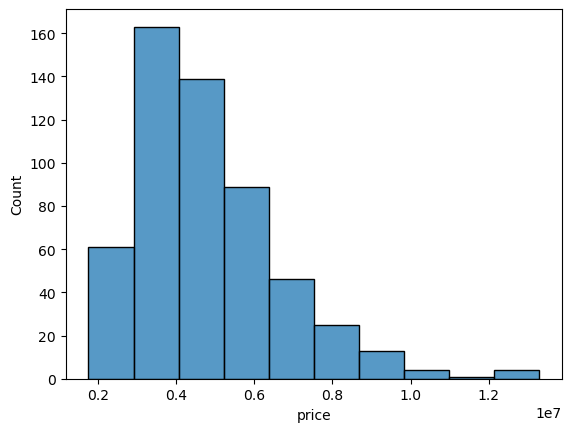

In [20]:
sns.histplot(Housing_prices_df['price'], bins=10);

In [21]:
test_normality(Housing_prices_df['price'])

Statistic=0.922, p-value=0.000
The sample does not appear to be normal (we reject H0)


### Applying the logarithmic transformation

Statistic=0.996, p-value=0.212
The sample appears to be normal (we cannot reject H0)


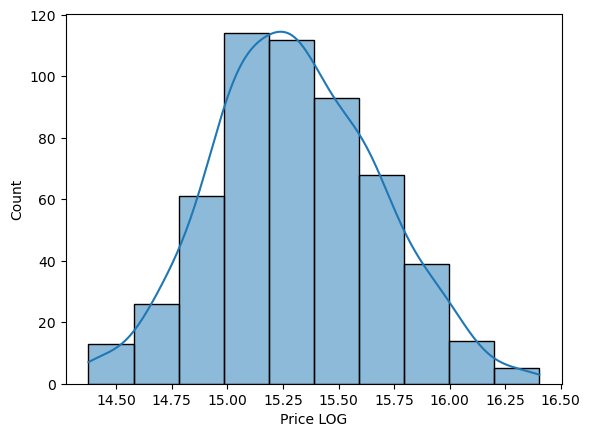

In [22]:
Housing_prices_df["Price LOG"] = np.log(Housing_prices_df['price'])
test_normality(Housing_prices_df["Price LOG"])
sns.histplot(Housing_prices_df['Price LOG'], bins=10, kde=True);

After applying the logarithmic transformation, it is confirmed that the data follow the normal distribution.

### Checking the correlation of variables

Since Price LOG is a transformation of Price, it is recommended to exclude one of these variables to avoid multicollinearity.

In [24]:
# Excluding Price
Housing_prices_df = Housing_prices_df.drop(['price'], axis=1)

In [25]:
# Verifying removal
Housing_prices_df.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus', 'Price LOG'],
      dtype='object')

In [26]:
# Correlation of variables with the target
Housing_prices_df[Housing_prices_df.columns].corr()['Price LOG'].sort_values()

bedrooms            0.369986
parking             0.371638
stories             0.415281
bathrooms           0.485715
area                0.543233
Price LOG           1.000000
mainroad                 NaN
guestroom                NaN
basement                 NaN
hotwaterheating          NaN
airconditioning          NaN
prefarea                 NaN
furnishingstatus         NaN
Name: Price LOG, dtype: float64

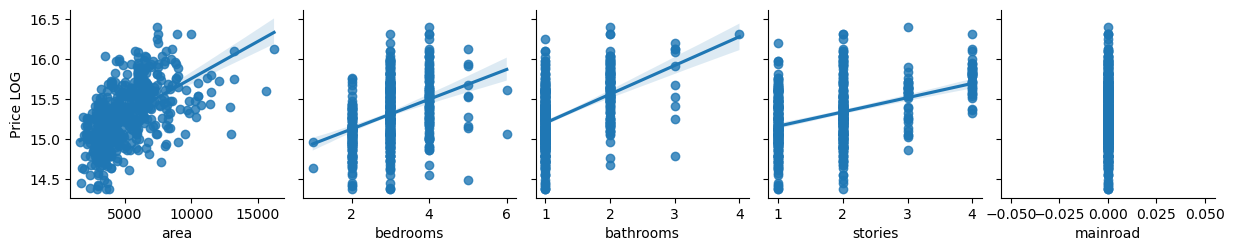

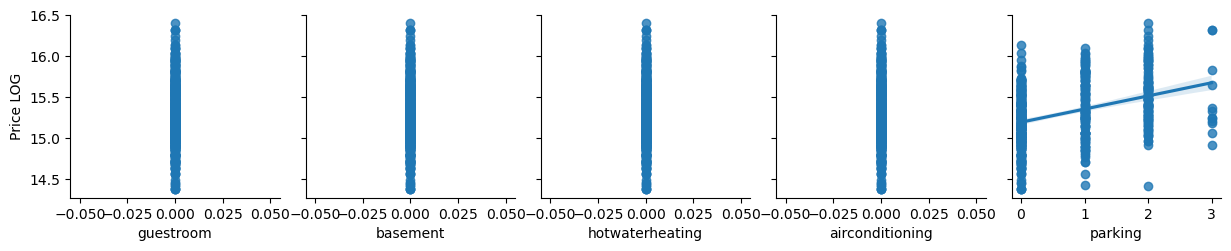

In [29]:
sns.pairplot(data=Housing_prices_df, y_vars=['Price LOG'], x_vars=numeric_columns[1:6], kind='reg')
sns.pairplot(data=Housing_prices_df, y_vars=['Price LOG'], x_vars=numeric_columns[6:-2], kind='reg')

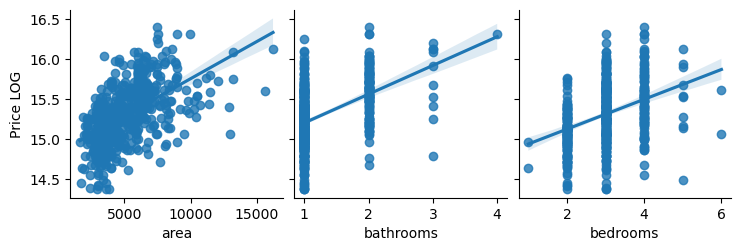

In [30]:
# Highlighting the attributes most correlated with the target

sns.pairplot(Housing_prices_df, y_vars='Price LOG', kind='reg',
                         x_vars=['area', 'bathrooms', 'bedrooms'])

### Data Transformation

In [31]:
Housing_prices_df["Area LOG"] = np.log(Housing_prices_df['area'])
Housing_prices_df["Bathrooms LOG"] = np.log(Housing_prices_df['bathrooms'])
Housing_prices_df["Bedrooms LOG"] = np.log(Housing_prices_df['bedrooms'] +1)

In [32]:
Housing_prices_df.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus', 'Price LOG', 'Area LOG', 'Bathrooms LOG',
       'Bedrooms LOG'],
      dtype='object')

In [33]:
Housing_prices_df = Housing_prices_df.drop(['area'], axis=1)
Housing_prices_df = Housing_prices_df.drop(['bathrooms'], axis=1)
Housing_prices_df = Housing_prices_df.drop(['bedrooms'], axis=1)

In [34]:
Housing_prices_df.columns

Index(['stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'parking', 'prefarea', 'furnishingstatus',
       'Price LOG', 'Area LOG', 'Bathrooms LOG', 'Bedrooms LOG'],
      dtype='object')

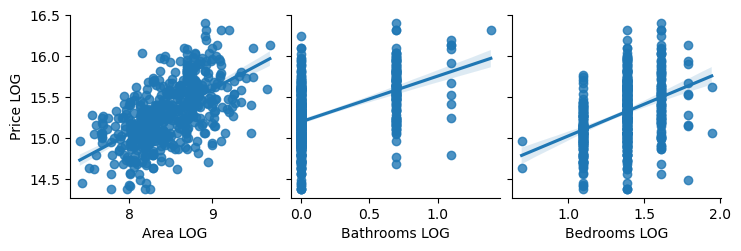

In [35]:
sns.pairplot(Housing_prices_df, y_vars='Price LOG', kind='reg',
                         x_vars=['Area LOG', 'Bathrooms LOG', 'Bedrooms LOG'])

### Creating Training and Testing Dataset

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
y = Housing_prices_df['Price LOG']

In [38]:
X = Housing_prices_df[['Area LOG', 'Bathrooms LOG', 'Bedrooms LOG']]

In [39]:
train_test_split(X, y, test_size=0.35, random_state= 41)

[     Area LOG  Bathrooms LOG  Bedrooms LOG
 405  8.026170       0.000000      1.386294
 331  8.890135       0.693147      1.386294
 388  8.202482       0.000000      1.386294
 325  8.149024       0.000000      1.609438
 22   8.993427       0.000000      1.386294
 ..        ...            ...           ...
 469  8.433812       0.000000      1.098612
 407  7.670895       0.000000      1.386294
 243  7.843849       0.000000      1.386294
 321  8.196988       0.693147      1.386294
 80   8.699515       0.000000      1.386294
 
 [354 rows x 3 columns],
      Area LOG  Bathrooms LOG  Bedrooms LOG
 410  8.255828       0.000000      1.386294
 137  8.442470       0.000000      1.609438
 451  8.817298       0.000000      1.098612
 83   8.699515       0.693147      1.386294
 369  8.188689       0.000000      1.098612
 ..        ...            ...           ...
 50   8.914626       0.693147      1.386294
 327  8.776476       0.000000      1.386294
 210  8.443762       0.000000      1.386294
 196 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 41)

In [41]:
X_train

,Area LOG,Bathrooms LOG,Bedrooms LOG
29,8.612503,0.693147,1.609438
16,8.794825,0.693147,1.609438
110,8.794825,0.000000,1.386294
446,8.290544,0.693147,1.098612
223,8.751633,0.000000,1.386294
...,...,...,...
469,8.433812,0.000000,1.098612
407,7.670895,0.000000,1.386294
243,7.843849,0.000000,1.386294
321,8.196988,0.693147,1.386294


## Multiple Linear Regression

Estimating model with statsmodels

In [42]:
X_train_with_constant = sm.add_constant(X_train)

In [44]:
model_statsmodels = sm.OLS(y_train, X_train_with_constant, hasconst= True).fit()

In [45]:
print(model_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              Price LOG   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     167.5
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           5.15e-72
Time:                        14:54:39   Log-Likelihood:                -25.411
No. Observations:                 436   AIC:                             58.82
Df Residuals:                     432   BIC:                             75.13
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.4331      0.275     37.967

Estimating model with training data

In [46]:
model = LinearRegression()

In [47]:
model.fit(X_train, y_train)

LinearRegression()

Obtaining the coefficient of determination (R²) of the estimated model with the training data

In [48]:
model.score(X_train, y_train).round(3)

0.538

Generating predictions for test data

In [50]:
y_predict = model.predict(X_test)

Interpretation of Estimated Coefficients

In [51]:
model.intercept_

10.433096382113561

We will transform the value obtained into reais

In [52]:
np.exp(model.intercept_)

33965.357330259954

Regression coefficients

In [53]:
model.coef_

array([0.50636253, 0.3371109 , 0.38542269])

In [54]:
index = ['Intercept', 'Area LOG', 'Bathrooms LOG', 'Bedrooms LOG']

In [55]:
pd.DataFrame(data=np.append(model.intercept_, model.coef_), index=index, columns=['Parameters'])

,Parameters
Intercept,10.433096
Area LOG,0.506363
Bathrooms LOG,0.337111
Bedrooms LOG,0.385423


* Excluding the value of the explanatory variables, the average effect on property prices would be exp[10.433096], that is, R$ 33965.35 reais;

* Regarding the LOG Area, keeping the other variables constant, the increase of 1% in the Property Area, generates, on average, an increase of 0.5% in the price of the property;

* In relation to Bathroom LOG, keeping the other variables constant, the increase of 1% in Bathroom of property, generates, on average, an increase of 0.3% in the price of the property;

* Regarding LOG air conditioning, keeping the other variables constant, a 1% increase in property air conditioning generates, on average, an increase of 0.3% in the property price.

## Viewing Estimated Value x Actual

In [56]:
y_predict_train = model.predict(X_train)

<Axes: title={'center': 'Prevision X Real'}, xlabel='log Price - Prevision', ylabel='log Price - Real'>

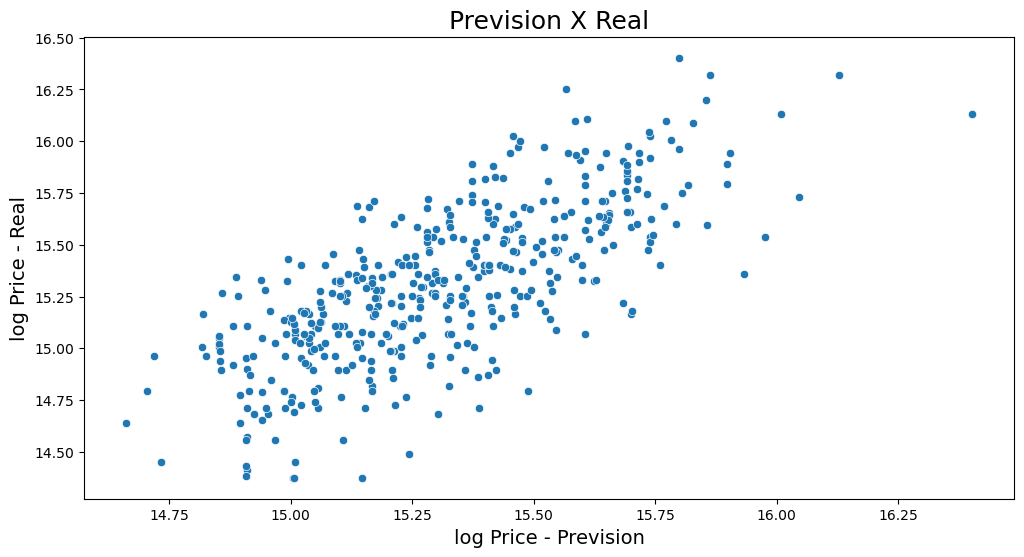

In [58]:
ax = sns.scatterplot(x=y_predict_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Prevision X Real', fontsize=18)
ax.set_xlabel('log Price - Prevision', fontsize=14)
ax.set_ylabel('log Price - Real', fontsize=14)
ax